## **ETL Pipeline Dataset Global Unificado y Particionamiento**

A continuación, se crea el *dataset* global resultante de la concatenación de ambos **DataFrames** (`df_iemocap` y `df_meld`). Este *dataset* debe de contar con aquellas columnas que entrarán a la **Red Neuronal**, y algunas de las más importantes son: `video_path` (ruta al *clip* de vídeo de dicho turno o *utterance*), `audio_path` (ruta al audio asociado a dicho *clip* de vídeo), `text` (transcripción), `target_stress` (variable objetivo binaria).

Para esto, se requiere la normalización de los nombres de las variables en ambos datasets, además de llevar a cabo un proceso de selección de qué variables son las que se encontrar en el *dataset* final.

Inicialmente, se cargan las librerías y paquetes necesarios para la ejecución de este *notebook*.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

DATA_ROOT = "../data"  # Se indica la ruta donde se encuentran todos los datos para el proyecto

FIGURAS_PATH = "../figuras"  # Ruta donde se guardarán las figuras generadas

MELD_CLEAN_CSV = os.path.join(DATA_ROOT, "PROCESSED", "MELD_clean.csv") #Ruta al archivo CSV preprocesado de MELD 
IEMOCAP_CLEAN_CSV = os.path.join(DATA_ROOT, "PROCESSED", "IEMOCAP_clean.csv")#Ruta al archivo CSV preprocesado de IEMOCAP

GLOBAL_CSV_PATH = os.path.join(DATA_ROOT, "PROCESSED", "Multimodal_Stress_Dataset.csv")

Carga de ambos *datasets* (`IEMOCAP_clean.csv` y `MELD_clean.csv`) preprocesados.

In [2]:
# MELD_clean.csv

file_path = MELD_CLEAN_CSV
if os.path.exists(file_path):
    df_meld = pd.read_csv(file_path)
    display(df_meld.head()) 
else:
    print(f"No se encuentra el archivo en {file_path}")

,Dialogue_ID,Utterance_ID,Unique_ID,Utterance,Emotion,target_stress,video_path,audio_path,duration,Speaker,split,word_count
0,0,0,train_dia0_utt0,also I was the point person on my company's tr...,neutral,0,train_splits/dia0_utt0.mp4,MELD_Audio/train_dia0_utt0.wav,5.672333,Chandler,train,16
1,0,1,train_dia0_utt1,You must've had your hands full.,neutral,0,train_splits/dia0_utt1.mp4,MELD_Audio/train_dia0_utt1.wav,1.501500,The Interviewer,train,6
2,0,2,train_dia0_utt2,That I did. That I did.,neutral,0,train_splits/dia0_utt2.mp4,MELD_Audio/train_dia0_utt2.wav,2.919583,Chandler,train,6
3,0,3,train_dia0_utt3,So let's talk a little bit about your duties.,neutral,0,train_splits/dia0_utt3.mp4,MELD_Audio/train_dia0_utt3.wav,2.752750,The Interviewer,train,9
4,0,4,train_dia0_utt4,My duties? All right.,surprise,0,train_splits/dia0_utt4.mp4,MELD_Audio/train_dia0_utt4.wav,6.464792,Chandler,train,4


In [3]:
# IEMOCAP_clean.csv

# Carga de los datos ya preprocesados
file_path = IEMOCAP_CLEAN_CSV
if os.path.exists(file_path):
    df_iemocap = pd.read_csv(file_path)
    display(df_iemocap.head()) 
else:
    print(f"No se encuentra el archivo en {file_path}")

,Utterance_ID,Session,Emotion,Valence,Arousal,Dominance,Text,Start_Time,End_Time,Path_Wav_Audio,Path_Video_Processed,Path_Source_Video,duration,Dialogue_ID,word_count,target_stress
0,Ses01F_impro01_F000,1,neutral,2.5,2.5,2.5,Excuse me.,6.2901,8.2357,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,IEMOCAP_CLIPS/Ses01F_impro01_F000.mp4,Session1/dialog/avi/DivX/Ses01F_impro01.avi,1.9456,Ses01F_impro01,2,0
1,Ses01F_impro01_F001,1,neutral,2.5,2.5,2.5,Yeah.,10.0100,11.3925,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,IEMOCAP_CLIPS/Ses01F_impro01_F001.mp4,Session1/dialog/avi/DivX/Ses01F_impro01.avi,1.3825,Ses01F_impro01,1,0
2,Ses01F_impro01_F002,1,neutral,2.5,2.5,2.5,Is there a problem?,14.8872,18.0175,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,IEMOCAP_CLIPS/Ses01F_impro01_F002.mp4,Session1/dialog/avi/DivX/Ses01F_impro01.avi,3.1303,Ses01F_impro01,4,0
3,Ses01F_impro01_F005,1,neutral,2.5,3.5,2.0,Well what's the problem? Let me change it.,27.4600,31.4900,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,IEMOCAP_CLIPS/Ses01F_impro01_F005.mp4,Session1/dialog/avi/DivX/Ses01F_impro01.avi,4.0300,Ses01F_impro01,8,0
4,Ses01F_impro01_F006,1,frustration,2.0,3.5,3.5,What? I'm getting an ID. This is why I'm here....,38.9650,43.5900,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,IEMOCAP_CLIPS/Ses01F_impro01_F006.mp4,Session1/dialog/avi/DivX/Ses01F_impro01.avi,4.6250,Ses01F_impro01,14,1


---

### **Unificación y Concatenación.**

In [4]:
# <----------------------------- 1. PREPARACIÓN DE MELD PARA LA FUSIÓN ----------------------------->

# Seleccionamos solo las columnas útiles para el modelo:

cols_meld = ['Unique_ID', 'Dialogue_ID', 'video_path', 'audio_path', 'Utterance', 'Emotion', 'duration', 'split', 'target_stress']

df_meld_clean = df_meld[cols_meld].copy()
df_meld_clean['dataset_origin'] = 'MELD' # Se crea una nueva variable que indique de qué dataset proviene dicho registro 


# Renombramos los nombres de algunas de las columnas para que coincidan en ambos datasets, y sea mucho más claro:

# Utterance --> Transcription
# Unique_ID --> Utterance_ID
df_meld_clean = df_meld_clean.rename(columns={
    'Utterance': 'Transcription',
    'Unique_ID': 'Utterance_ID'
})

# Aseguramos además que los IDs sean strings (al igual que el Dialogue_ID en IEMOCAP)
df_meld_clean['Dialogue_ID'] = df_meld_clean['Dialogue_ID'].astype(str)

# <----------------------------- 2. PREPARACIÓN DE IEMOCAP PARA LA FUSIÓN  ----------------------------->

####################################### 2.1 ESTRATEGIA DE SPLIT #####################################

# Para que coincida con MELD, debemos añadir una nueva columna 'split', que por defecto vamos a asignarla No_Split

df_iemocap['split'] = 'No_Split'

# Seleccionamos las columnas útiles: 

cols_iemocap = ['Utterance_ID', 'Dialogue_ID', 'Path_Video_Processed', 'Path_Wav_Audio', 'Text', 'duration', 'target_stress', 'split']
df_iemocap_clean = df_iemocap[cols_iemocap].copy()

# Renombramos las rutas de IEMOCAP para que tengan el mismo nombre que en MELD:

# Path_Video_Processed -> video_path
# Path_Wav_Audio -> audio_path
# Text -> Transcription
df_iemocap_clean = df_iemocap_clean.rename(columns={
    'Path_Video_Processed': 'video_path',
    'Path_Wav_Audio': 'audio_path',
    'Text': 'Transcription'
})
df_iemocap_clean['dataset_origin'] = 'IEMOCAP' # Marcamos el origen de cada registro

# <----------------------------- 3. CONCATENACIÓN  ----------------------------->

# Definimos las columnas finales a seleccionar:
cols_final = ['Utterance_ID', 'Dialogue_ID', 'video_path', 'audio_path', 'Transcription', 'duration', 'split', 'target_stress', 'dataset_origin']
df_meld_clean = df_meld_clean[cols_final]
df_iemocap_clean = df_iemocap_clean[cols_final]
df_global = pd.concat([df_meld_clean, df_iemocap_clean], axis=0, ignore_index=True)

#  Normalización de rutas 
# Cambiamos todas las '\' por '/' para que funcione en Linux/Mac/Colab
df_global['video_path'] =  df_global['video_path'].str.replace('\\', '/', regex=False)
df_global['audio_path'] =  df_global['audio_path'].str.replace('\\', '/', regex=False)

# Verificación:
print(f"Dimensiones MELD: {df_meld_clean.shape}")
print(f"Dimensiones IEMOCAP:{df_iemocap_clean.shape}")
print(f"Dimensiones GLOBAL: {df_global.shape}")
print(df_global['dataset_origin'].value_counts())
print(print(df_global.groupby(['dataset_origin', 'split']).size()))

Dimensiones MELD: (13704, 9)
Dimensiones IEMOCAP:(7515, 9)
Dimensiones GLOBAL: (21219, 9)
dataset_origin
MELD       13704
IEMOCAP     7515
Name: count, dtype: int64
dataset_origin  split   
IEMOCAP         No_Split    7515
MELD            dev         1108
                test        2608
                train       9988
dtype: int64
None


Se explica a continuación el criterio de selección de columnas seguido:

1.  **Identificadores (`Utterance_ID`, `Dialogue_ID`):** Esenciales para reconstruir la secuencia temporal y el contexto de la conversación o *utterance*. Se conservan los identificadores únicos de cada turno de palabra y, crucialmente, el ID del diálogo al que pertenecen. Esta variable es fundamental para permitir que el modelo capture el contexto conversacional, analizando la secuencia temporal de interacciones en lugar de tratar cada frase como un evento aislado.
2.  **Rutas de Archivos (`video_path`, `audio_path`):** Punteros físicos a los datos crudos procesados.
3.  **Inputs del Modelo (`Transcription`, `duration`):** `Transcription` será la entrada del modelo de texto (BERT/RoBERTa) y `duration` sirve para control de calidad y padding.
4.  **Target (`target_stress`):** La etiqueta de nuestra variable objetivo de **Estrés** (0/1).
5.  **Metadatos de Gestión (`split`, `dataset_origin`):**
    * `dataset_origin`: Esencial para poder filtrar o aplicar estrategias de entrenamiento diferenciadas según el *dataset* del que procede el dato.
    * `split`: Conservamos la partición original de MELD. Para IEMOCAP se asigna 'No_Split' inicialmente ya que aplicaremos *Leave-One-Session-Out*.

Finalmente, guardamos el dataset **global** bajo el nombre de `Multimodal_Stress_Dataset.csv`. En este **CSV** único se incluye la concatenación de ambos datasets (`df_iemocap` y `df_meld`) y servirá como entrada, tras su debido particionamiento, a nuestro modelo.

In [5]:
df_global.to_csv(GLOBAL_CSV_PATH, index=False)
df_global.info()
df_global.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21219 entries, 0 to 21218
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Utterance_ID    21219 non-null  object 
 1   Dialogue_ID     21219 non-null  object 
 2   video_path      21219 non-null  object 
 3   audio_path      21219 non-null  object 
 4   Transcription   21219 non-null  object 
 5   duration        21219 non-null  float64
 6   split           21219 non-null  object 
 7   target_stress   21219 non-null  int64  
 8   dataset_origin  21219 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


,Utterance_ID,Dialogue_ID,video_path,audio_path,Transcription,duration,split,target_stress,dataset_origin
0,train_dia0_utt0,0,train_splits/dia0_utt0.mp4,MELD_Audio/train_dia0_utt0.wav,also I was the point person on my company's tr...,5.672333,train,0,MELD
1,train_dia0_utt1,0,train_splits/dia0_utt1.mp4,MELD_Audio/train_dia0_utt1.wav,You must've had your hands full.,1.501500,train,0,MELD
2,train_dia0_utt2,0,train_splits/dia0_utt2.mp4,MELD_Audio/train_dia0_utt2.wav,That I did. That I did.,2.919583,train,0,MELD
3,train_dia0_utt3,0,train_splits/dia0_utt3.mp4,MELD_Audio/train_dia0_utt3.wav,So let's talk a little bit about your duties.,2.752750,train,0,MELD
4,train_dia0_utt4,0,train_splits/dia0_utt4.mp4,MELD_Audio/train_dia0_utt4.wav,My duties? All right.,6.464792,train,0,MELD


-----
### **División del *Dataset* Unificado**

Como ya hemos justificado previamente, en **MELD** se mantiene el mismo particionamiento original (**train, dev, test**). En **IEMOCAP** aplicaremos *Leave-One-Session-Out*, una estrategia que consiste en que, como tenemos **5 sesiones** con actores distintos en cada una, se entrena con un subconjunto de esas particiones (por ejemplo: **sesiones 1,2,3**), se deja una (**sesión 5**) para *test* (donde están la pareja X que nuestro modelo nunca ha escuchado) y otra sesión (**sesion 4**) para validación.

In [6]:
########################## División (split) IEMOCAP #######################

#------ Estrategia 3-1-1 -------

# Train: Sesiones 1,2,3 (~60%)
# Dev: Sesión 4 (~20%)
# Test: Sesión 5 (~20%)

# Función para asignar el split según la Sesión (Ses01, Ses02, Ses03 -> Train, Ses04 -> Dev, Ses05 -> Test)
def asignar_split_iemocap(utterance_id):
    if 'Ses01' in utterance_id or 'Ses02' in utterance_id or 'Ses03' in utterance_id:
        return 'train'
    elif 'Ses04' in utterance_id:
        return 'dev'   # Sesión 4 para validación
    elif 'Ses05' in utterance_id:
        return 'test'  # Sesión 5 para test 
    else:
        return 'train' # Por defecto 
    
# Creamos máscara para quedarnos únicamente con los registros IEMOCAP en el dataset global:
mask_iemocap = df_global['dataset_origin'] == 'IEMOCAP'

df_global.loc[mask_iemocap, 'split'] = df_global.loc[mask_iemocap, 'Utterance_ID'].apply(asignar_split_iemocap)

# ----------------------VERIFICACIÓN ------------------------------
print("Comprobación de Splits por Dataset:")
print(df_global.groupby(['dataset_origin', 'split']).size())

Comprobación de Splits por Dataset:
dataset_origin  split
IEMOCAP         dev      1536
                test     1649
                train    4330
MELD            dev      1108
                test     2608
                train    9988
dtype: int64


Mostramos dos gráficas que muestren el particionamiento realizado y el resultado final de nuestro dataset definitivo:

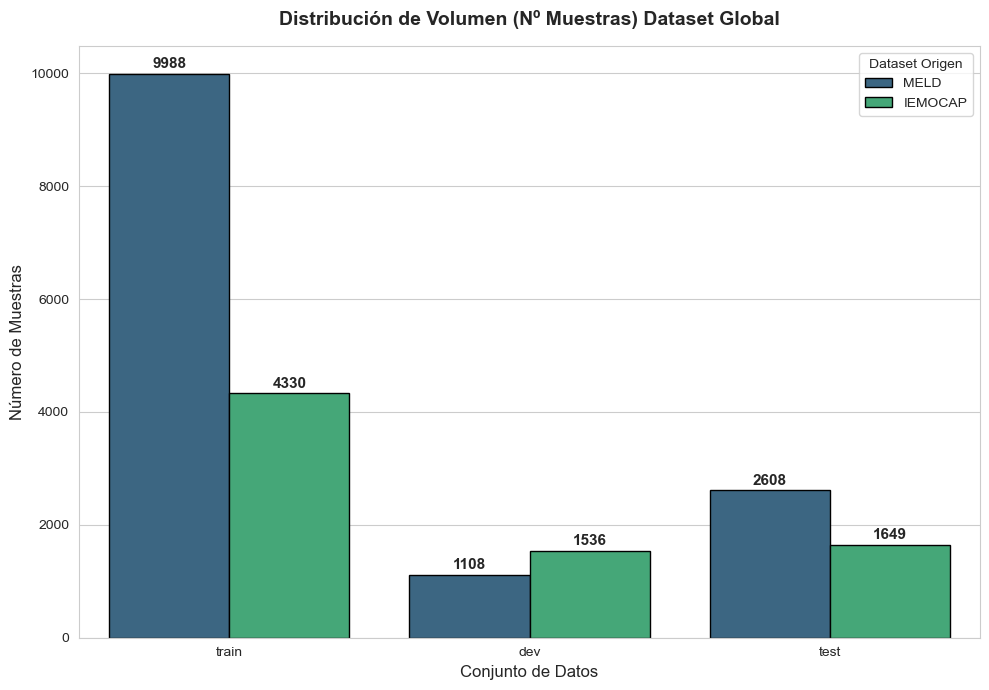

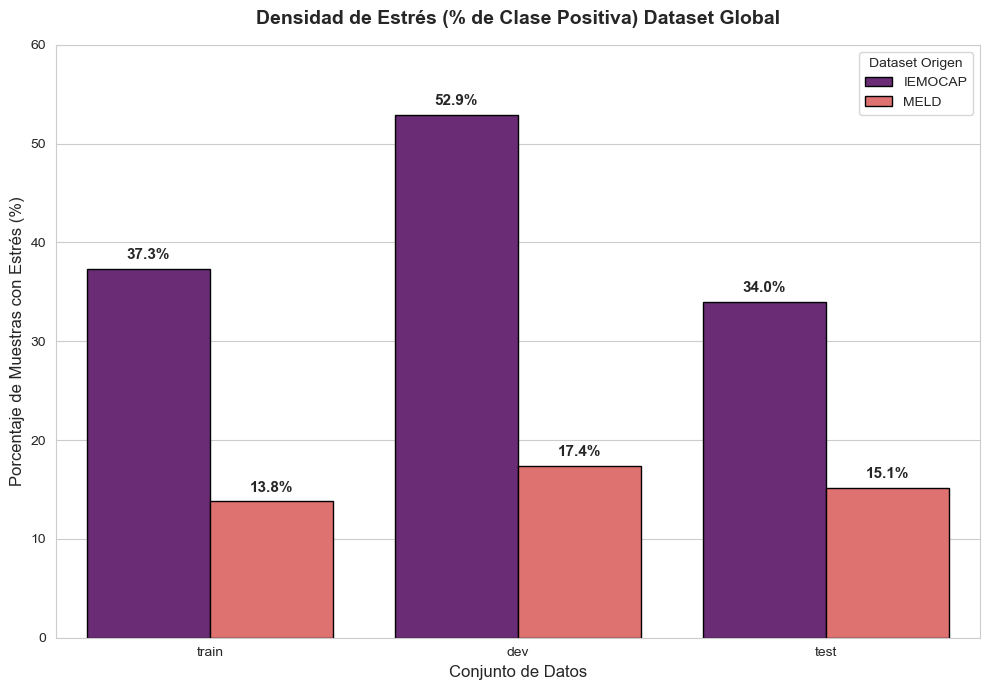

In [ ]:
# Configuración estética
sns.set_style("whitegrid")

plt.figure(figsize=(10,7))

order_splits = ['train', 'dev', 'test']


# GRÁFICO 1 (IZQUIERDA): Volumen de datos en cada partición


ax1 = sns.countplot(data=df_global, x='split', hue='dataset_origin', 
              order=order_splits, palette='viridis', edgecolor='black')

plt.title('Distribución de Volumen (Nº Muestras) Dataset Global', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Conjunto de Datos', fontsize=12)
plt.ylabel('Número de Muestras', fontsize=12)
plt.legend(title='Dataset Origen')

# Etiquetas con el número total
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(p.get_x() + p.get_width()/2., height + 100, 
                f'{int(height)}', ha="center", fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(FIGURAS_PATH, 'Fig_3_24_1_Global_Splits_Stress.png'), dpi=300)
plt.show()

# GRÁFICO 2 (DERECHA): Densidad de estrés

plt.figure(figsize=(10,7))

# Calculamos el porcentaje de estrés por grupo
# Agrupamos por Origen y Split, calculamos la media del target (0 o 1) y multiplicamos por 100
stress_ratios = df_global.groupby(['dataset_origin', 'split'])['target_stress'].mean().reset_index()
stress_ratios['stress_pct'] = stress_ratios['target_stress'] * 100

ax2=sns.barplot(data=stress_ratios, x='split', y='stress_pct', hue='dataset_origin',
            order=order_splits, palette='magma', edgecolor='black')

plt.title('Densidad de Estrés (% de Clase Positiva) Dataset Global', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Conjunto de Datos', fontsize=12)
plt.ylabel('Porcentaje de Muestras con Estrés (%)', fontsize=12)
plt.ylim(0, 60) # Fijamos límite para ver mejor (IEMOCAP suele estar entre 40-50%)
plt.legend(title='Dataset Origen')


for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.text(p.get_x() + p.get_width()/2., height + 1, 
                f'{height:.1f}%', ha="center", fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(FIGURAS_PATH, 'Fig_3_24_2_Global_Splits_Stress.png'), dpi=300)
plt.show()

In [8]:
# Actualizamos el dataset guardado con el particionamiento realizado:
df_global.to_csv(GLOBAL_CSV_PATH, index=False)
df_global.info()
df_global.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21219 entries, 0 to 21218
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Utterance_ID    21219 non-null  object 
 1   Dialogue_ID     21219 non-null  object 
 2   video_path      21219 non-null  object 
 3   audio_path      21219 non-null  object 
 4   Transcription   21219 non-null  object 
 5   duration        21219 non-null  float64
 6   split           21219 non-null  object 
 7   target_stress   21219 non-null  int64  
 8   dataset_origin  21219 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


,Utterance_ID,Dialogue_ID,video_path,audio_path,Transcription,duration,split,target_stress,dataset_origin
0,train_dia0_utt0,0,train_splits/dia0_utt0.mp4,MELD_Audio/train_dia0_utt0.wav,also I was the point person on my company's tr...,5.672333,train,0,MELD
1,train_dia0_utt1,0,train_splits/dia0_utt1.mp4,MELD_Audio/train_dia0_utt1.wav,You must've had your hands full.,1.501500,train,0,MELD
2,train_dia0_utt2,0,train_splits/dia0_utt2.mp4,MELD_Audio/train_dia0_utt2.wav,That I did. That I did.,2.919583,train,0,MELD
3,train_dia0_utt3,0,train_splits/dia0_utt3.mp4,MELD_Audio/train_dia0_utt3.wav,So let's talk a little bit about your duties.,2.752750,train,0,MELD
4,train_dia0_utt4,0,train_splits/dia0_utt4.mp4,MELD_Audio/train_dia0_utt4.wav,My duties? All right.,6.464792,train,0,MELD
